# Predicting Restaurant Food Cost

## Importing Libaries

In [ ]:
# Converting price back to original scale and making it integer
#Predict=np.exp(Predict)
#Predict=Predict.astype(int)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
#from catboost import CatBoostRegressor

In [3]:
train = pd.read_excel('Data_Train.xlsx', )
test = pd.read_excel('Data_Test.xlsx')
#sub = pd.read_excel('food_submission.xlsx')

In [4]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [5]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [6]:
a = np.log(train['COST'])

## DATA ANALYSIS

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
TITLE            12690 non-null object
RESTAURANT_ID    12690 non-null int64
CUISINES         12690 non-null object
TIME             12690 non-null object
CITY             12578 non-null object
LOCALITY         12592 non-null object
RATING           12688 non-null object
VOTES            11486 non-null object
COST             12690 non-null int64
dtypes: int64(2), object(7)
memory usage: 892.3+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
TITLE            4231 non-null object
RESTAURANT_ID    4231 non-null int64
CUISINES         4231 non-null object
TIME             4231 non-null object
CITY             4196 non-null object
LOCALITY         4201 non-null object
RATING           4229 non-null object
VOTES            3829 non-null object
dtypes: int64(1), object(7)
memory usage: 264.5+ KB


In [9]:
print(train['TITLE'].nunique())
print(train['RESTAURANT_ID'].nunique())
print(train['CUISINES'].nunique())
print(train['TIME'].nunique())
print(train['CITY'].nunique())
print(train['LOCALITY'].nunique())
print(train['RATING'].nunique())
print(train['VOTES'].nunique())

113
11892
4155
2689
359
1416
32
1847


In [12]:
train['CITY'].value_counts()

Chennai                                         2174
Bangalore                                       2149
Hyderabad                                       1819
Mumbai                                          1722
New Delhi                                       1321
Kochi                                           1279
Gurgaon                                          379
Secunderabad                                     310
Noida                                            211
Navi Mumbai                                      165
Ghaziabad                                        102
Thane                                             97
Faridabad                                         79
Bandra West                                       69
Thane West                                        52
Andheri West                                      48
Bengaluru                                         42
Greater Noida                                     31
India                                         

In [13]:
train[train['CITY'] == 'Mumbai']['COST'].mean()

865.2729384436701

In [14]:
train[train['CITY'] == 'Chennai']['COST'].mean()

588.5878564857405

In [15]:
train[train['CITY'] == 'Bangalore']['COST'].mean()

668.733829688227

In [16]:
train['RATING'] = train['RATING'].astype('object')
# for test set
test['RATING'] = test['RATING'].astype('object') # replace the rating

In [17]:
train['RATING'] = train['RATING'].replace({'-':0.0, 'NEW':5.0}) # replace the rating
# for test set
test['RATING'] = test['RATING'].replace({'-':0.0, 'NEW':5.0}) # replace the rating

In [18]:
train['RATING'].describe()

count     12688
unique       32
top         3.9
freq       1238
Name: RATING, dtype: object

In [19]:
train['RATING'] = train['RATING'].astype(float) # replace the rating
# for test set
test['RATING'] = test['RATING'].astype(float) # replace the rating

checking the missing value

In [20]:
train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [21]:
test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [82]:
train.corr()

,RESTAURANT_ID,RATING,COST
RESTAURANT_ID,1.000000,0.032962,0.040710
RATING,0.032962,1.000000,0.208523
COST,0.040710,0.208523,1.000000


## DATA VISUALIZATION

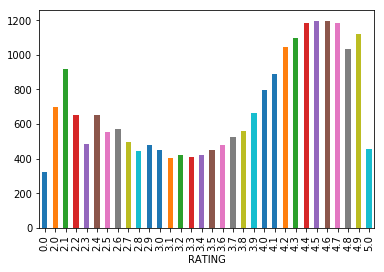

In [92]:
train.groupby(['RATING'])['COST'].mean().plot(kind='bar')

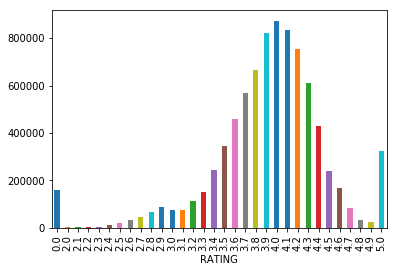

In [91]:
train.groupby(['RATING'])['COST'].sum().plot(kind='bar')

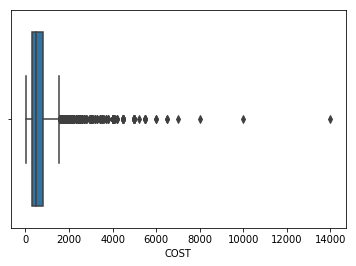

In [90]:
sns.boxplot(train['COST'])

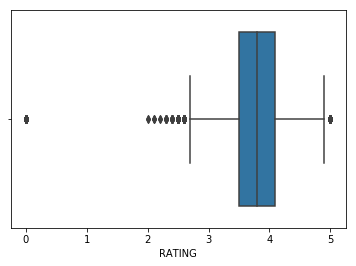

In [89]:
sns.boxplot(train['RATING'])

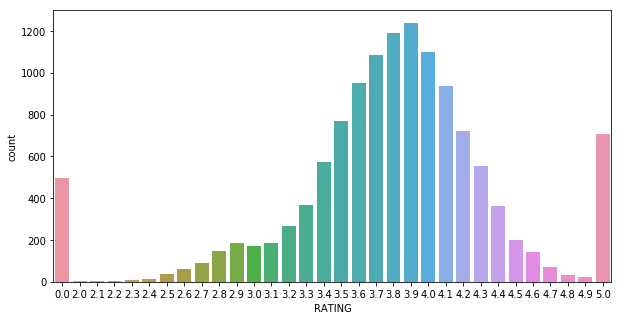

In [85]:
plt.figure(figsize=(10,5))
sns.countplot(train['RATING'])

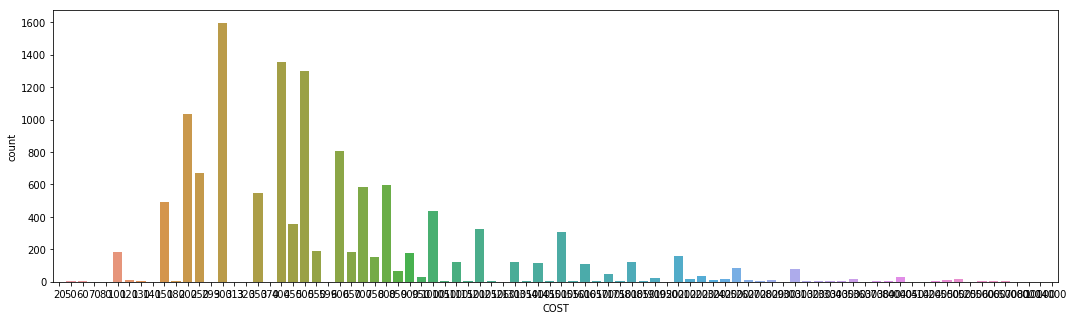

In [88]:
plt.figure(figsize=(18,5))
sns.countplot(train['COST'])

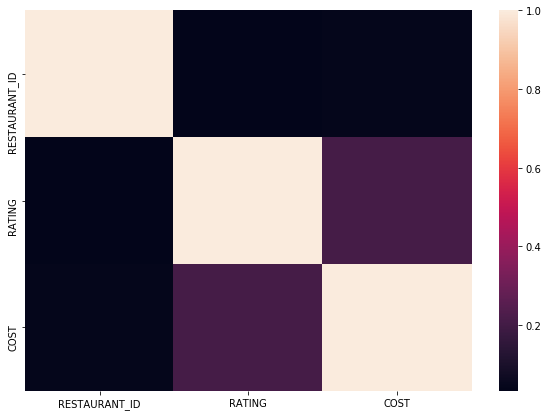

In [83]:
plt.figure(figsize=(10,7))
sns.heatmap(train.corr())

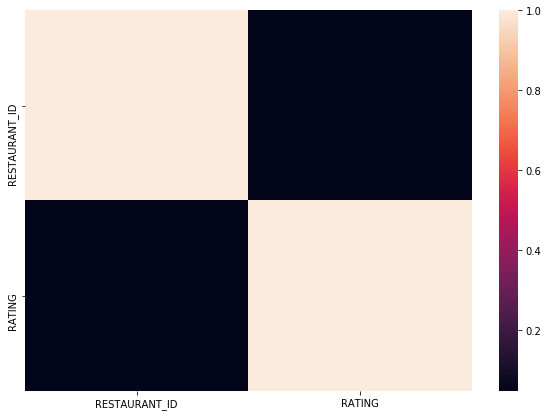

In [84]:
plt.figure(figsize=(10,7))
sns.heatmap(test.corr())

## joining the data

In [22]:
train['source']= 'train'
test['source'] = 'test'

In [23]:
data=pd.concat([train, test],ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [24]:
data.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,source
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes,train
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes,train
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes,train
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes,train
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes,train


In [25]:
new1_test = data["VOTES"].str.split(" ", n = 1, expand =True) 

In [26]:
data['votes_no'] = new1_test[0]
data['votes'] = new1_test[1]

In [27]:
data.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,source,votes_no,votes
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes,train,49,votes
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes,train,30,votes
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes,train,221,votes
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes,train,24,votes
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes,train,165,votes


In [28]:
data['votes_no'] = data['votes_no'].astype(float)

## EDA  filling missing value

In [29]:
data['votes_no'] = data['votes_no'].fillna(44.0) # filling with mode

In [30]:
data['RATING'] = data['RATING'].fillna(3.8) # filling with the median 

In [31]:
data['LOCALITY'] = data['LOCALITY'].fillna('Gachibowli')

In [32]:
data['CITY'] = data['CITY'].fillna('Chennai')

droping values

In [33]:
data = data.drop(['VOTES', 'votes'], axis=1)

## EDA feature engineering

In [34]:
data['title_rat'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].mean())
data['title_rat_C'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].count())
data['city_rat'] = data['CITY'].map(data.groupby('CITY')['RATING'].mean())
data['city_rat_C'] = data['CITY'].map(data.groupby('CITY')['RATING'].count())
data['cuisine_rat'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].mean())
data['cuisine_rat_C'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].count())

In [35]:
data['rest_id'] = data['RESTAURANT_ID'].map(data.groupby('RESTAURANT_ID')['RATING'].count())
data['rest_id_votes'] = data['RESTAURANT_ID'].map(data.groupby('RESTAURANT_ID')['votes_no'].count())

In [36]:
data['title_rat_sum'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].sum())
data['title_rat_C_sum'] = data['TITLE'].map(data.groupby('TITLE')['RATING'].sum())
data['city_rat_sum'] = data['CITY'].map(data.groupby('CITY')['RATING'].sum())
data['city_rat_C_sum'] = data['CITY'].map(data.groupby('CITY')['RATING'].sum())
data['cuisine_rat_sum'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].sum())
data['cuisine_rat_C_sum'] = data['CUISINES'].map(data.groupby('CUISINES')['RATING'].sum())

In [37]:
data['rat_vote'] = data['RATING'] * data['votes_no']

## converison of data

In [38]:
from sklearn.preprocessing import LabelEncoder
cols = ('CUISINES', 'TIME', 'LOCALITY', 'TITLE', 'CITY')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

# shape        
print('Shape all_data: {}'.format(data.shape))

Shape all_data: (16921, 25)


In [39]:
data.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,source,votes_no,...,cuisine_rat_C,rest_id,rest_id_votes,title_rat_sum,title_rat_C_sum,city_rat_sum,city_rat_C_sum,cuisine_rat_sum,cuisine_rat_C_sum,rat_vote
0,400,1200.0,3294,328,3.6,9438,898,34,train,49.0,...,1,1,1,17928.8,17928.8,490.4,490.4,3.6,3.6,176.4
1,75,1500.0,364,1214,4.2,13198,2301,36,train,30.0,...,1,2,2,1897.8,1897.8,10974.7,10974.7,4.2,4.2,126.0
2,75,800.0,3729,1272,3.8,10915,806,34,train,221.0,...,4,1,1,17928.8,17928.8,10974.7,10974.7,14.6,14.6,839.8
3,277,800.0,5156,161,4.1,6346,340,104,train,24.0,...,3,1,1,20224.2,20224.2,9289.8,9289.8,12.2,12.2,98.4
4,277,300.0,2218,709,3.8,15387,750,55,train,165.0,...,117,1,1,1888.6,1888.6,9289.8,9289.8,407.1,407.1,627.0


## Training and Testing of our model

### Spliting our data set

In [40]:
Train = data.loc[data['source']=='train']
Test = data.loc[data['source']=='test']

In [41]:
Train.drop('source',axis=1,inplace=True)
Test.drop(['source','COST'],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [42]:
Train.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,votes_no,title_rat,...,cuisine_rat_C,rest_id,rest_id_votes,title_rat_sum,title_rat_C_sum,city_rat_sum,city_rat_C_sum,cuisine_rat_sum,cuisine_rat_C_sum,rat_vote
0,400,1200.0,3294,328,3.6,9438,898,34,49.0,3.651487,...,1,1,1,17928.8,17928.8,490.4,490.4,3.6,3.6,176.4
1,75,1500.0,364,1214,4.2,13198,2301,36,30.0,4.098920,...,1,2,2,1897.8,1897.8,10974.7,10974.7,4.2,4.2,126.0
2,75,800.0,3729,1272,3.8,10915,806,34,221.0,3.651487,...,4,1,1,17928.8,17928.8,10974.7,10974.7,14.6,14.6,839.8
3,277,800.0,5156,161,4.1,6346,340,104,24.0,3.589670,...,3,1,1,20224.2,20224.2,9289.8,9289.8,12.2,12.2,98.4
4,277,300.0,2218,709,3.8,15387,750,55,165.0,3.717717,...,117,1,1,1888.6,1888.6,9289.8,9289.8,407.1,407.1,627.0


In [43]:
Test.head()

,CITY,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,votes_no,title_rat,title_rat_C,...,cuisine_rat_C,rest_id,rest_id_votes,title_rat_sum,title_rat_C_sum,city_rat_sum,city_rat_C_sum,cuisine_rat_sum,cuisine_rat_C_sum,rat_vote
12690,323,3878,1314,4.3,4085,1417,34,564.0,3.651487,4910,...,2,1,1,17928.8,17928.8,1115.9,1115.9,8.3,8.3,2425.2
12691,277,4879,429,4.2,12680,2548,104,61.0,3.589670,5634,...,1,1,1,20224.2,20224.2,9289.8,9289.8,4.2,4.2,256.2
12692,277,4333,774,3.8,1411,614,34,350.0,3.651487,4910,...,1,1,1,17928.8,17928.8,9289.8,9289.8,3.8,3.8,1330.0
12693,128,631,846,3.8,204,2955,95,1445.0,3.895726,1287,...,164,1,1,5013.8,5013.8,423.9,423.9,586.0,586.0,5491.0
12694,216,4891,570,3.6,13453,586,104,23.0,3.589670,5634,...,32,1,1,20224.2,20224.2,4194.4,4194.4,100.9,100.9,82.8


In [44]:
X = Train.drop('COST', axis=1)
y = a

In [45]:
from sklearn.linear_model import Ridge

In [46]:
r = Ridge()

In [47]:
r.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
pred = r.predict(X)

In [49]:
pred

array([6.53588047, 6.93296746, 6.4931246 , ..., 6.78748621, 6.4616864 ,
       6.37552013])

In [50]:
x_test = Test

In [51]:
test_pred = r.predict(x_test)

In [52]:
# Converting price back to original scale and making it integer
Predict=np.exp(test_pred)
Predict=Predict.astype(int)

In [53]:
a =pd.DataFrame(Predict, columns=['COST'])

In [54]:
a

,COST
0,774
1,410
2,716
3,514
4,297
5,343
6,726
7,653
8,519
9,499


In [55]:
a.to_excel('cost1.xlsx')

## xgboost

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1994)

In [59]:
xg = XGBRegressor(max_depth=5, learning_rate=0.01, n_estimators=500)

In [60]:
xgs = XGBRegressor(max_depth=7, learning_rate=0.1, n_estimators=200,random_state=1994)

In [61]:
xg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:55:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [62]:
preds = xg.predict(X_test)

In [63]:
xgs.fit(X, y)

[22:55:59] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=1994,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [64]:
predss = xgs.predict(X)

In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, log_loss

In [66]:
print(np.sqrt(mean_squared_error(predss, y)))

0.23920668023319325


In [67]:
predss

array([6.744522 , 7.3217025, 6.446233 , ..., 7.2686195, 6.164946 ,
       6.3968167], dtype=float32)

In [68]:
test_predss = xgs.predict(Test)

In [69]:
# Converting price back to original scale and making it integer
Predicted=np.exp(test_predss)
Predicted=Predicted.astype(int)

In [70]:
abc =pd.DataFrame(Predicted, columns=['COST'])

In [71]:
abc

,COST
0,1243
1,361
2,667
3,265
4,271
5,334
6,668
7,658
8,436
9,566


In [72]:
abc.to_excel('cost90.xlsx')

In [73]:
preds

array([5.89791  , 6.4422674, 6.4236283, ..., 8.079106 , 5.9109526,
       6.7890778], dtype=float32)

In [74]:
test_preds = xg.predict(x_test)

In [75]:
test_preds

array([7.0221343, 5.969846 , 6.4683566, ..., 5.6800814, 5.706836 ,
       5.7721415], dtype=float32)

In [76]:
# Converting price back to original scale and making it integer
Predicts=np.exp(test_preds)
Predicts=Predicts.astype(int)

In [77]:
ab =pd.DataFrame(Predicts, columns=['COST'])

## Output we have predicted cost

In [78]:
ab

,COST
0,1121
1,391
2,644
3,348
4,285
5,337
6,696
7,703
8,425
9,497


In [79]:
ab.to_excel('cost2.xlsx')